## **Project Description**

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading the datasets given
import requests
import pandas as pd

df = pd.read_csv('loan_prediction.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
df.shape

(614, 13)

In [9]:
#checking for missing values in the dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.duplicated().any()

False

In [11]:
df.isin(['NAN','NA','N/A','-',' ','?','--']).sum().any()

False

<AxesSubplot:>

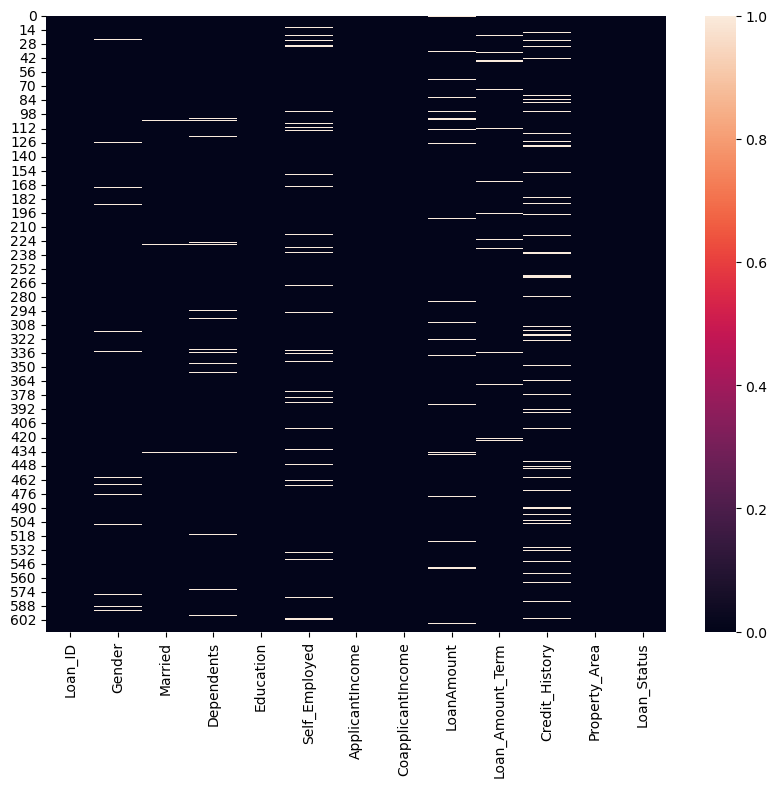

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [13]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [15]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [16]:
df["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [17]:
# as the NAN/ missing values are very less compared to whole dataset, we can drop the missing values
df1=df.dropna()

In [18]:
df1.shape

(480, 13)

In [19]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As more data was dropped, lets replace some Null values with column mean values

In [20]:
df.shape

(614, 13)

In [21]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [22]:
#Replacing the null values im the LoanAmount column with the column mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [23]:
#Replacing the null values im the Loan_Amount_Term column with the column median
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [24]:
#Replacing the null values im the Credit_History column with the column mode
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode())

In [25]:
# as the NAN/ missing values are very less compared to whole dataset, we can drop the missing values
df1=df.dropna()

In [26]:
df1.shape

(511, 13)

In [30]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

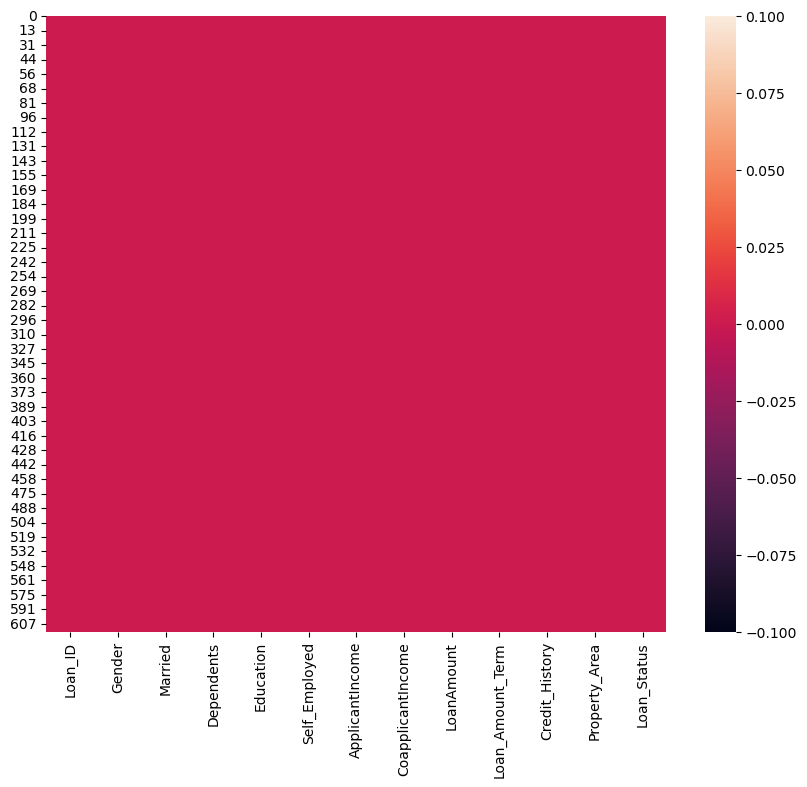

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.isnull())

# **Visualisations **

# Univariate Analysis

The values count of  Gender  are: 


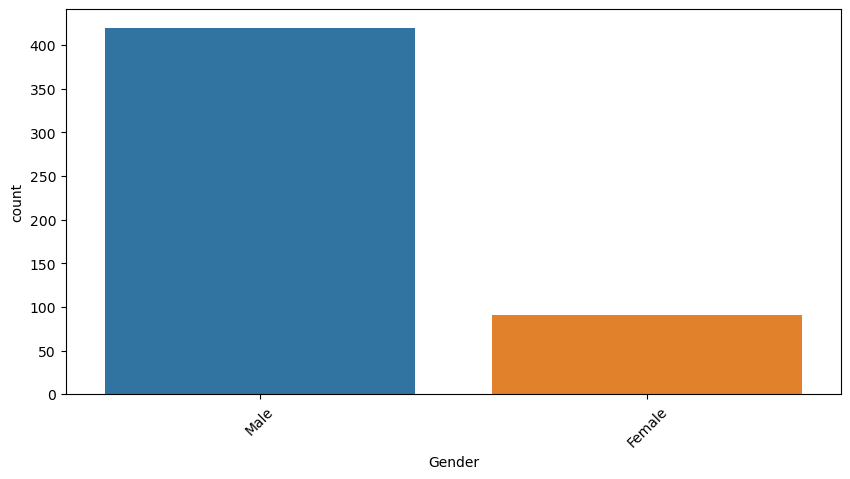

The values count of  Married  are: 


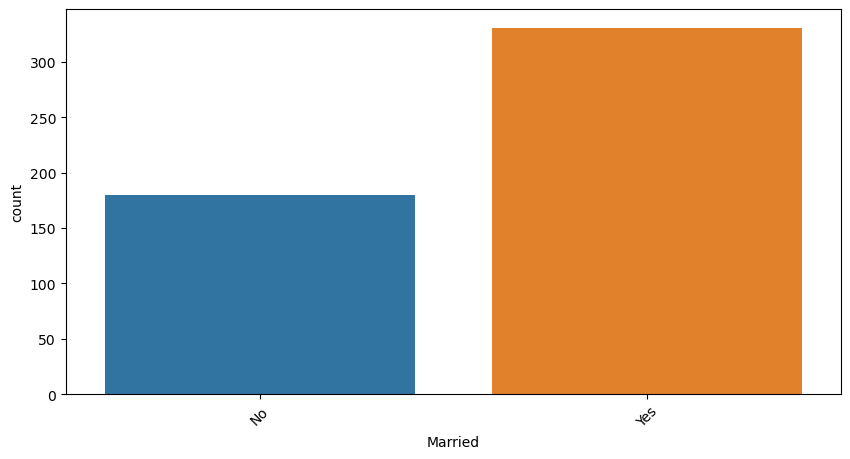

The values count of  Dependents  are: 


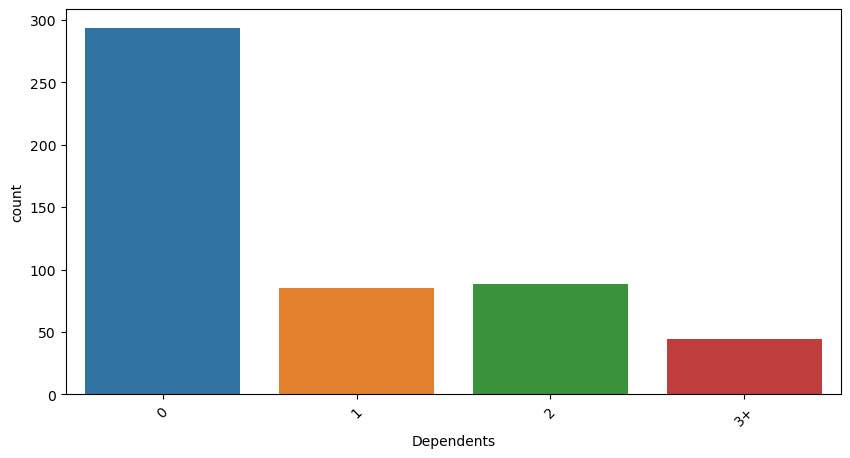

The values count of  Education  are: 


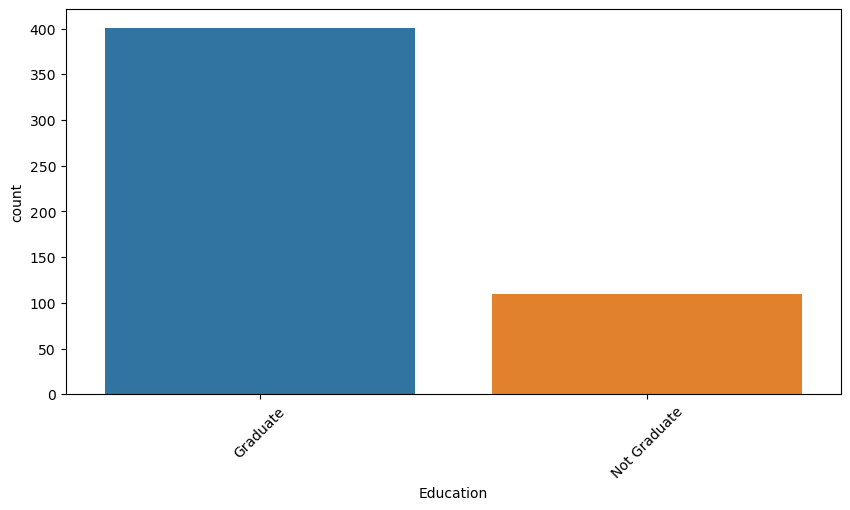

The values count of  Self_Employed  are: 


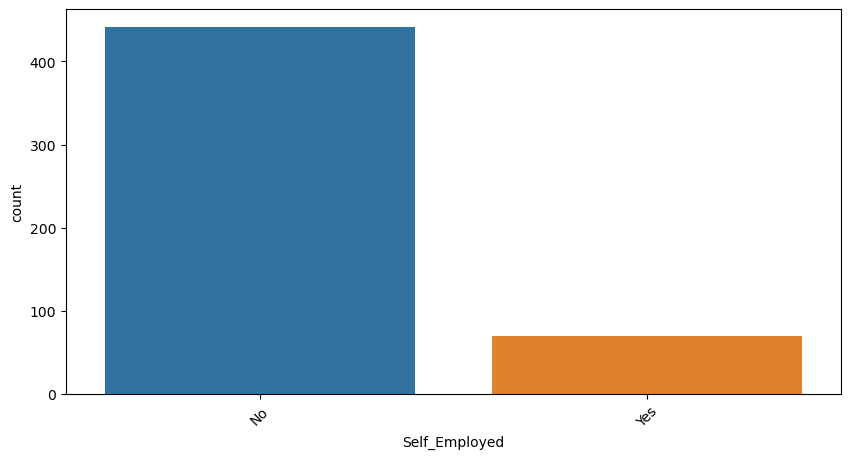

The values count of  ApplicantIncome  are: 


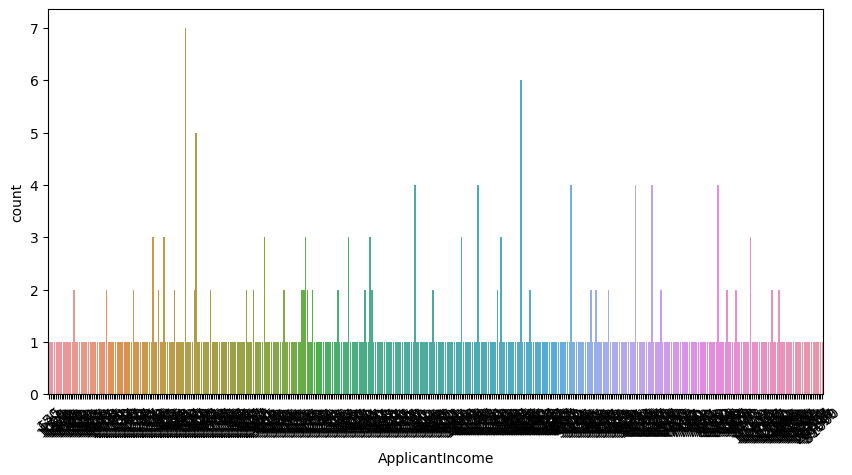

The values count of  CoapplicantIncome  are: 


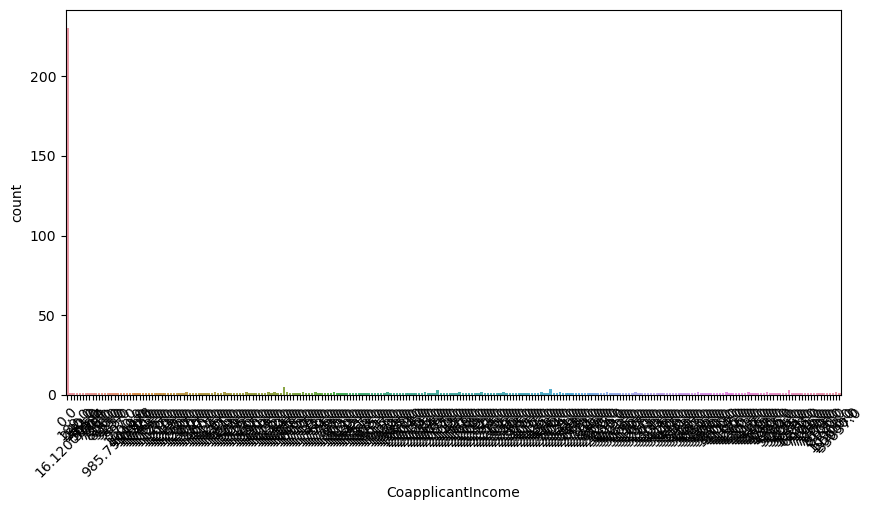

The values count of  LoanAmount  are: 


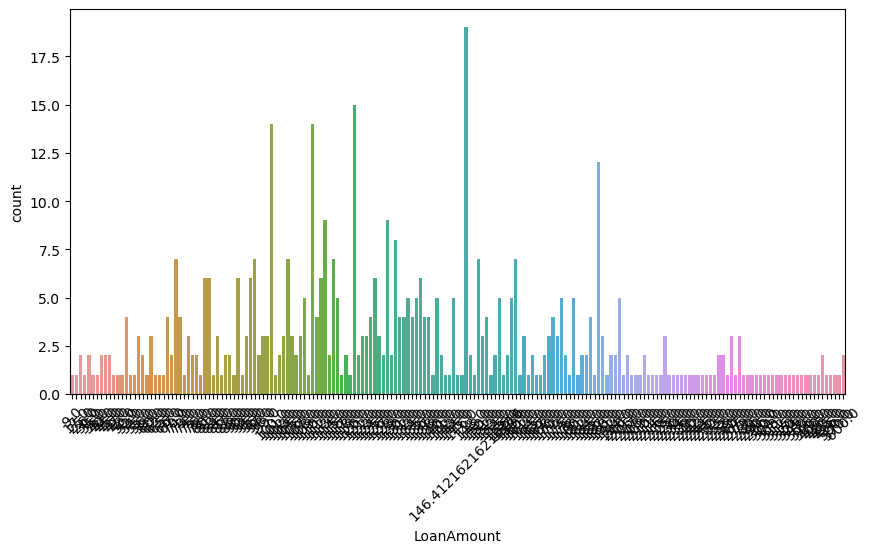

The values count of  Loan_Amount_Term  are: 


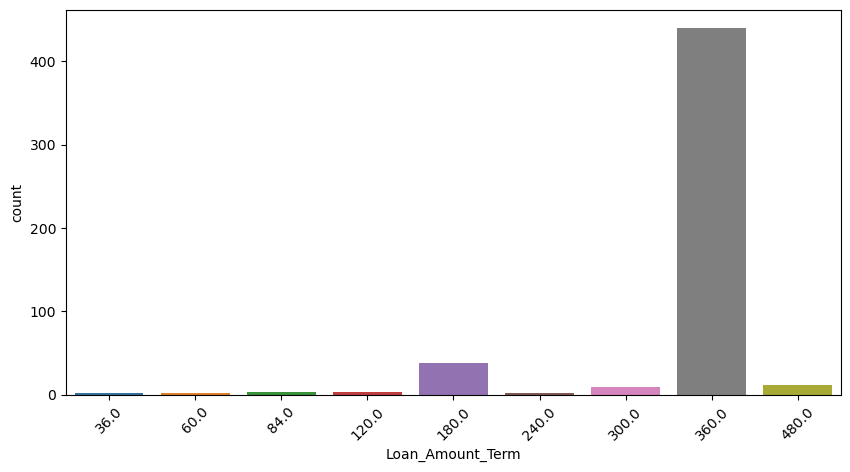

The values count of  Credit_History  are: 


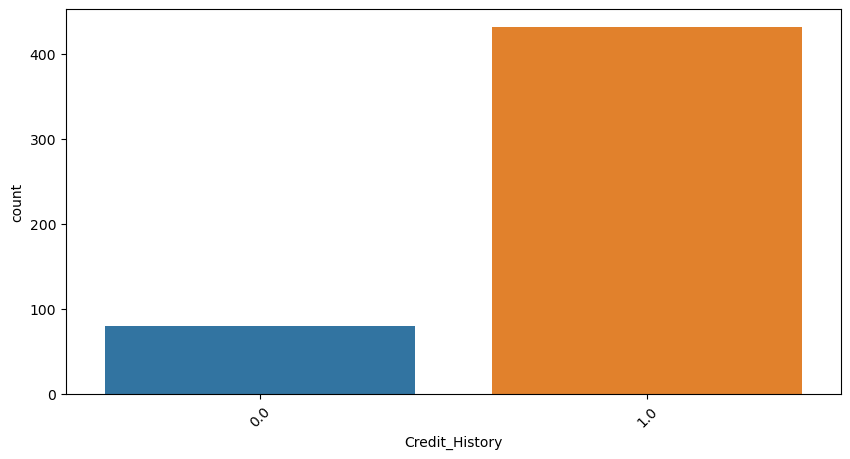

The values count of  Property_Area  are: 


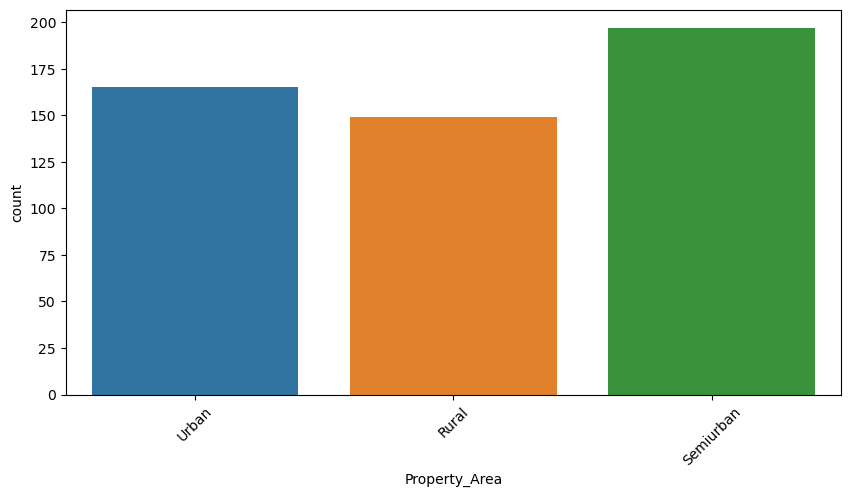

The values count of  Loan_Status  are: 


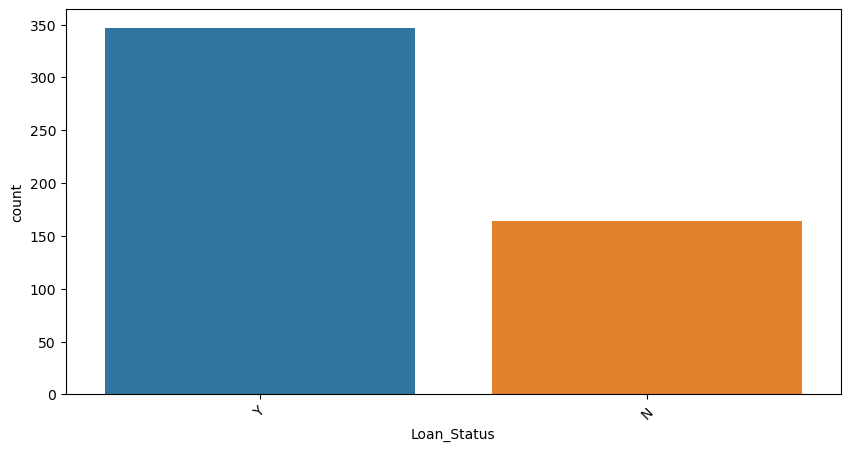

In [36]:
#bar plot for all columns
columns = ["Gender","Married","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term",
          "Credit_History","Property_Area","Loan_Status"]
for i in columns:
    print("The values count of ",i," are: ")
    #print(df.groupby(df1[i]).value_counts())
    plt.figure(figsize=(10,5))
    sns.countplot(x=df1[i], data = df1)
    plt.xticks(rotation=45)
    plt.show()

# **Bivariate Analysis**

The values count of  Gender  are: 
Gender  Loan_Status
Female  Y               57
        N               34
Male    Y              290
        N              130
Name: Loan_Status, dtype: int64


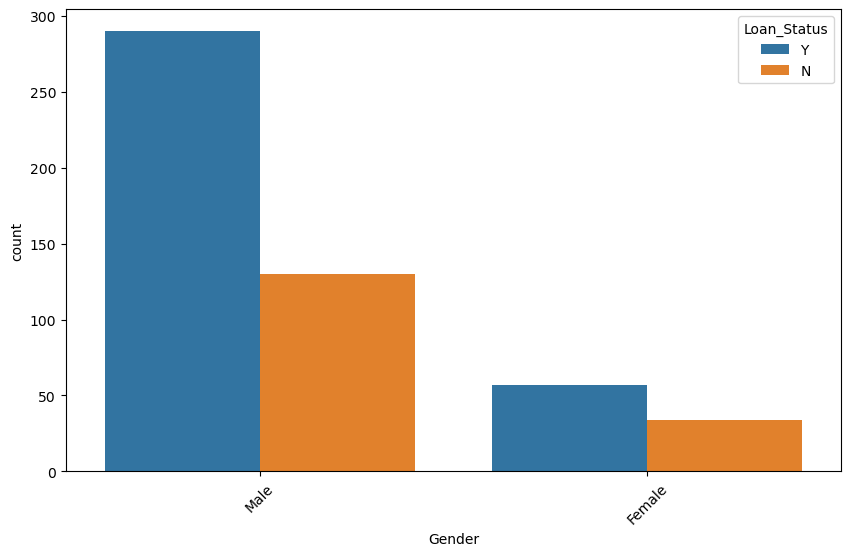

The values count of  Married  are: 
Married  Loan_Status
No       Y              111
         N               69
Yes      Y              236
         N               95
Name: Loan_Status, dtype: int64


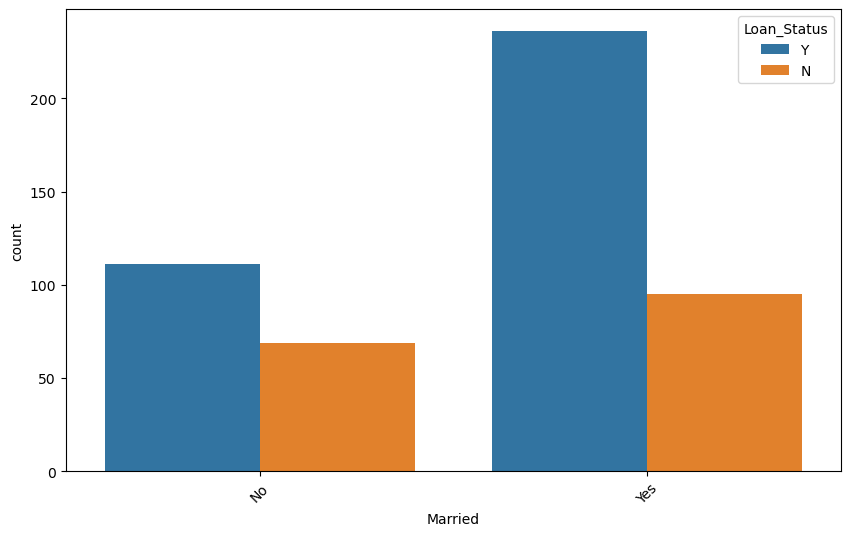

The values count of  Dependents  are: 
Dependents  Loan_Status
0           Y              198
            N               96
1           Y               55
            N               30
2           Y               66
            N               22
3+          Y               28
            N               16
Name: Loan_Status, dtype: int64


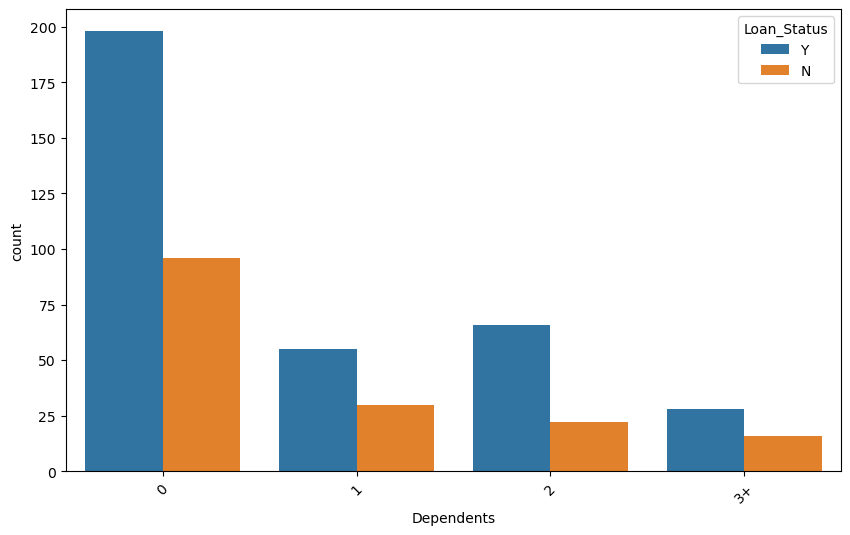

The values count of  Education  are: 
Education     Loan_Status
Graduate      Y              281
              N              120
Not Graduate  Y               66
              N               44
Name: Loan_Status, dtype: int64


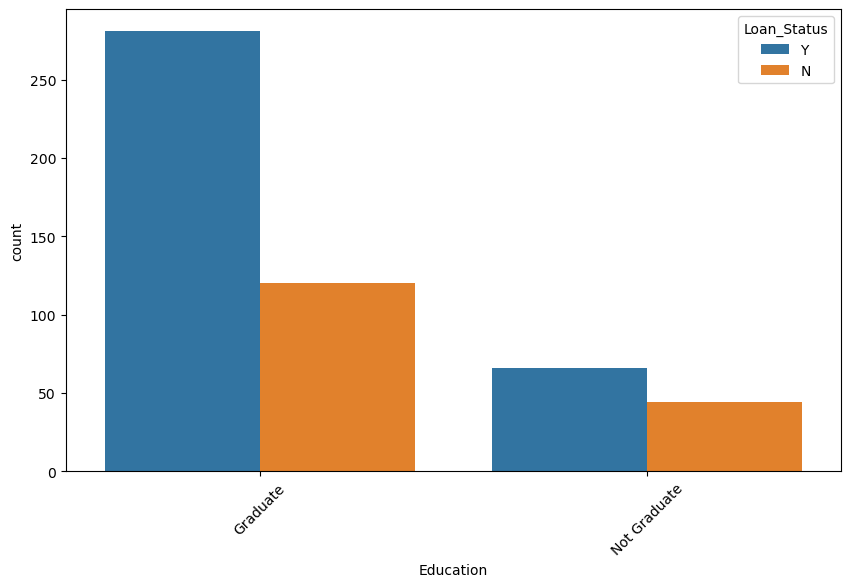

The values count of  Self_Employed  are: 
Self_Employed  Loan_Status
No             Y              301
               N              140
Yes            Y               46
               N               24
Name: Loan_Status, dtype: int64


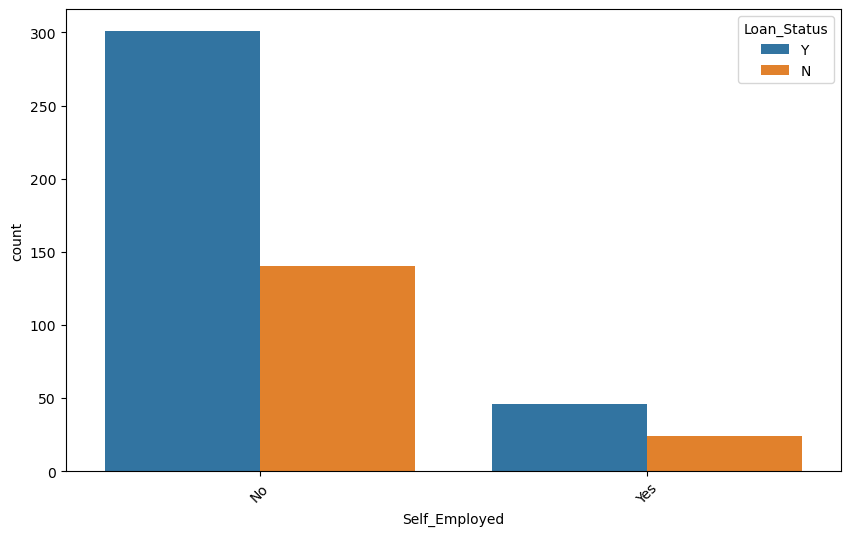

The values count of  ApplicantIncome  are: 
ApplicantIncome  Loan_Status
150.0            N              1
645.0            Y              1
1000.0           N              1
1025.0           Y              1
1299.0           Y              1
                               ..
33846.0          N              1
37719.0          Y              1
39147.0          Y              1
39999.0          Y              1
81000.0          N              1
Name: Loan_Status, Length: 457, dtype: int64


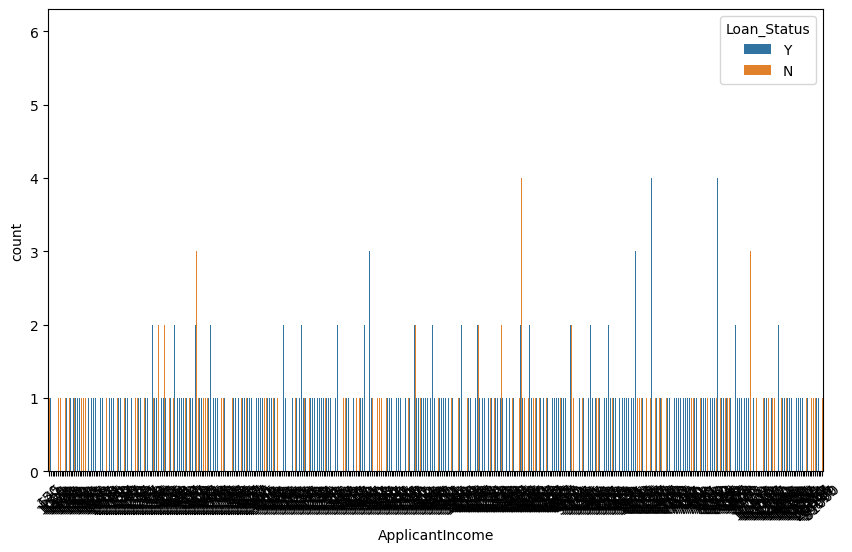

The values count of  CoapplicantIncome  are: 
CoapplicantIncome  Loan_Status
0.000000           Y              146
                   N               84
16.120001          Y                1
189.000000         Y                1
240.000000         Y                1
                                 ... 
10968.000000       N                1
11300.000000       N                1
20000.000000       N                1
                   Y                1
33837.000000       N                1
Name: Loan_Status, Length: 260, dtype: int64


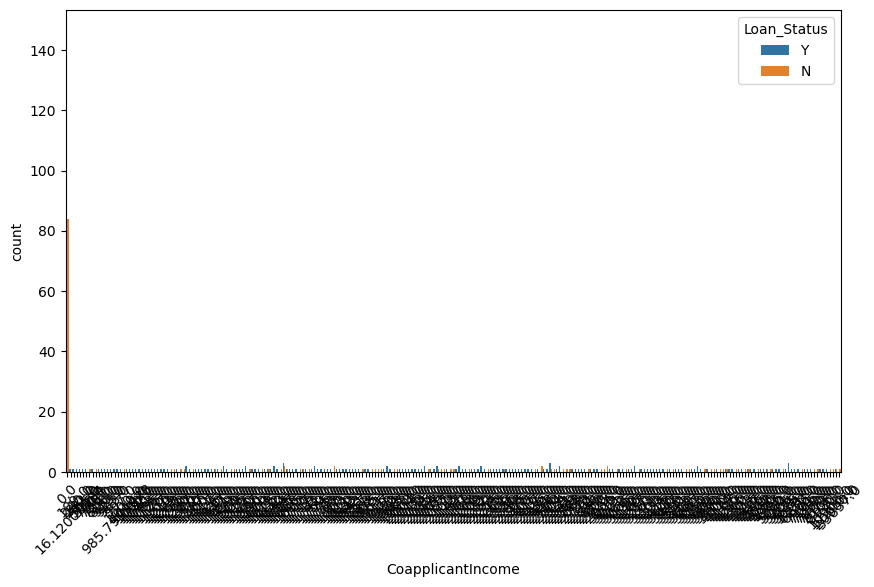

The values count of  LoanAmount  are: 
LoanAmount  Loan_Status
9.0         N              1
17.0        Y              1
25.0        Y              2
26.0        Y              1
30.0        Y              2
                          ..
495.0       N              1
496.0       Y              1
500.0       N              1
570.0       N              1
600.0       Y              2
Name: Loan_Status, Length: 257, dtype: int64


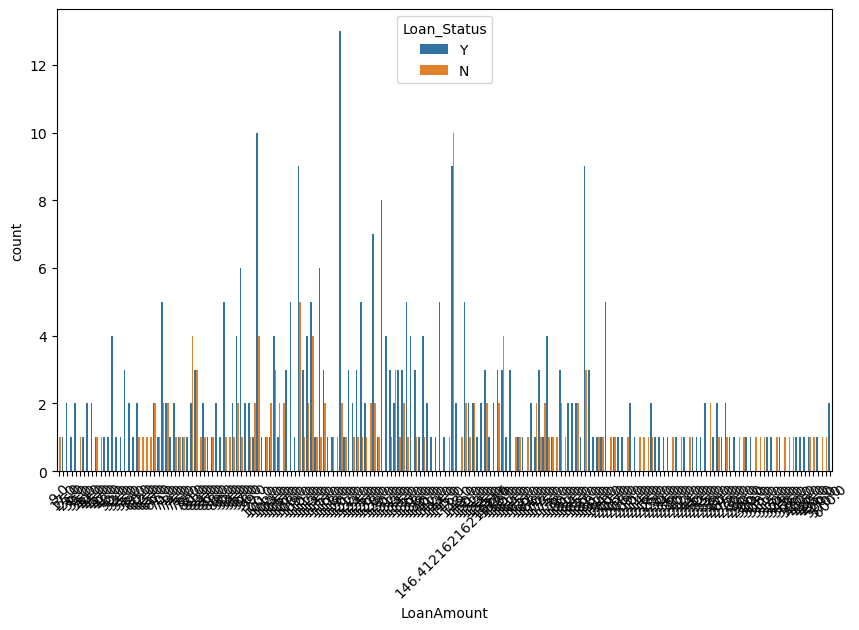

The values count of  Loan_Amount_Term  are: 
Loan_Amount_Term  Loan_Status
36.0              N                2
60.0              Y                2
84.0              Y                2
                  N                1
120.0             Y                3
180.0             Y               24
                  N               14
240.0             N                1
                  Y                1
300.0             N                5
                  Y                4
360.0             Y              307
                  N              133
480.0             N                8
                  Y                4
Name: Loan_Status, dtype: int64


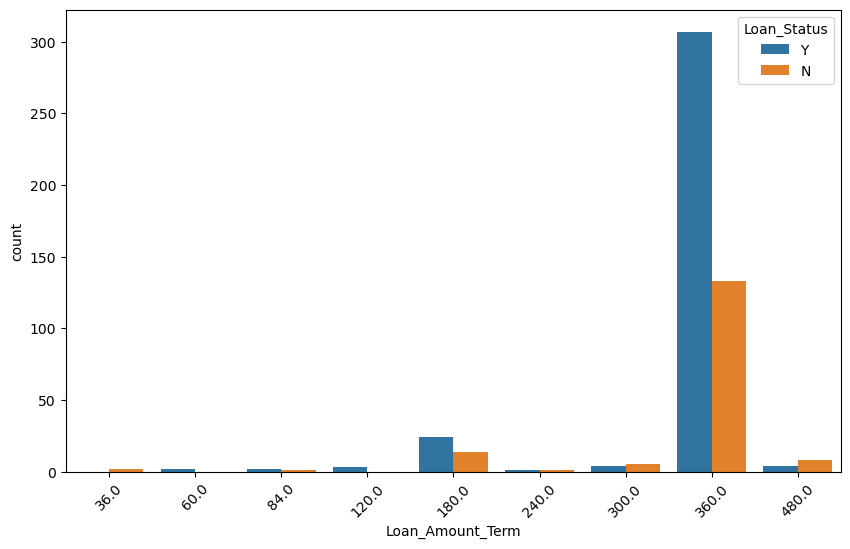

The values count of  Credit_History  are: 
Credit_History  Loan_Status
0.0             N               73
                Y                7
1.0             Y              340
                N               91
Name: Loan_Status, dtype: int64


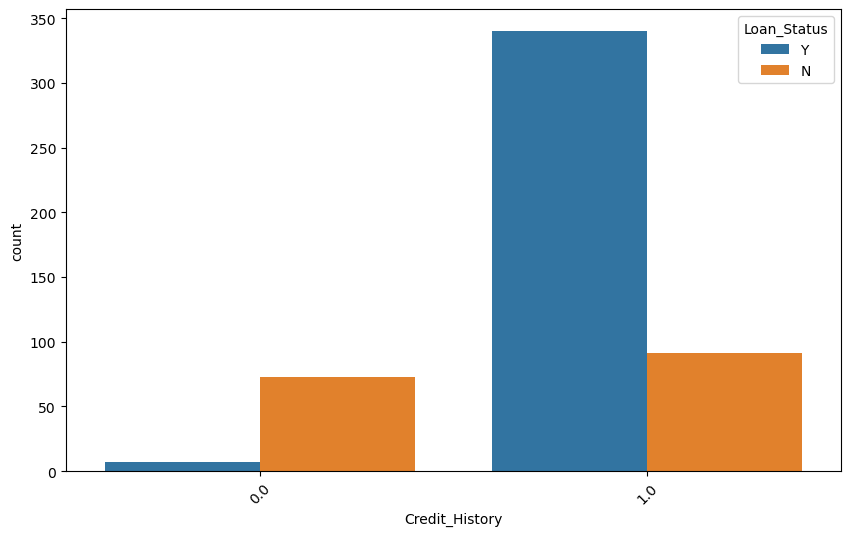

The values count of  Property_Area  are: 
Property_Area  Loan_Status
Rural          Y               90
               N               59
Semiurban      Y              153
               N               44
Urban          Y              104
               N               61
Name: Loan_Status, dtype: int64


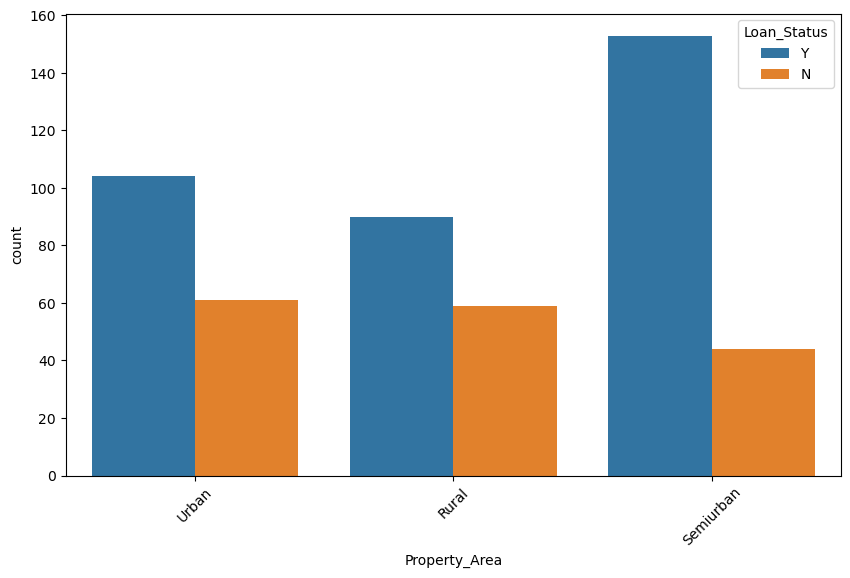

The values count of  Loan_Status  are: 
Loan_Status  Loan_Status
N            N              164
Y            Y              347
Name: Loan_Status, dtype: int64


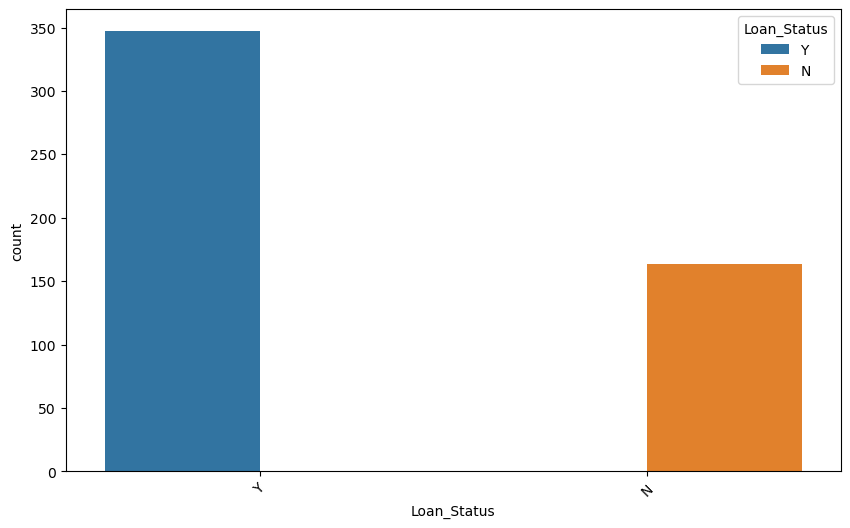

In [37]:
#bar plot for 
columns = ["Gender","Married","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term",
          "Credit_History","Property_Area","Loan_Status"]
for i in columns:
    print("The values count of ",i," are: ")
    print(df.groupby(df1[i])['Loan_Status'].value_counts())
    plt.figure(figsize=(10,6))
    sns.countplot(x=df1[i], hue = "Loan_Status", data = df1)
    plt.xticks(rotation=45)
    plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Count'>

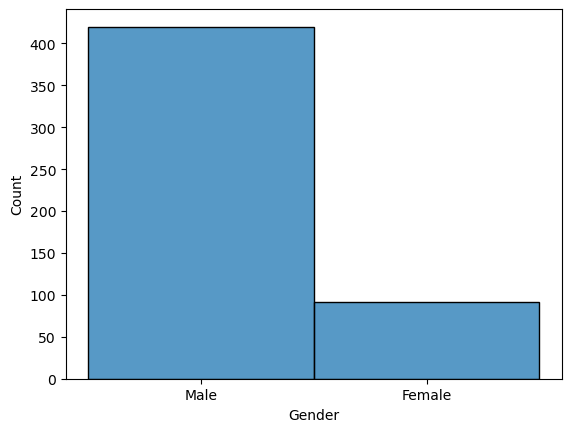

In [38]:
sns.histplot(df1['Gender'])

  



<AxesSubplot:xlabel='Married', ylabel='Count'>

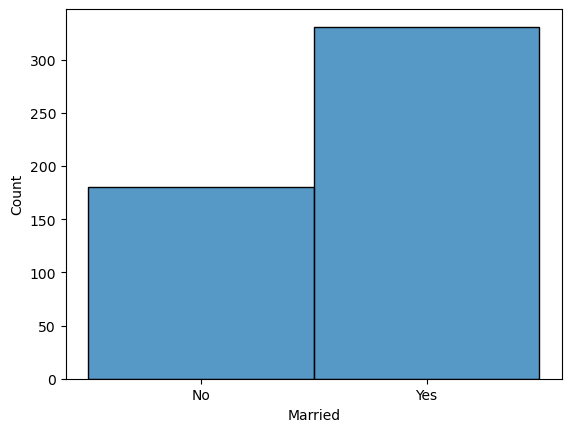

In [39]:
sns.histplot(df1['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='Count'>

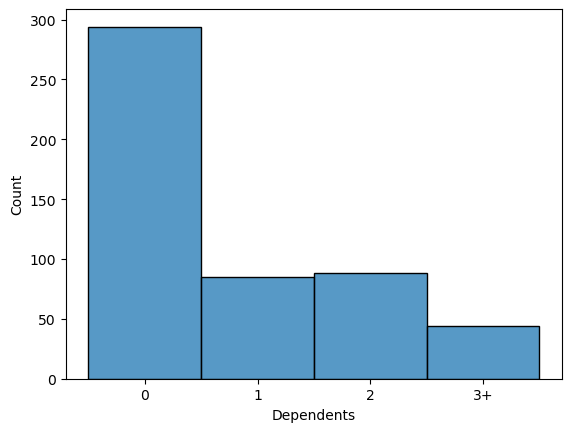

In [40]:
sns.histplot(df1['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='Count'>

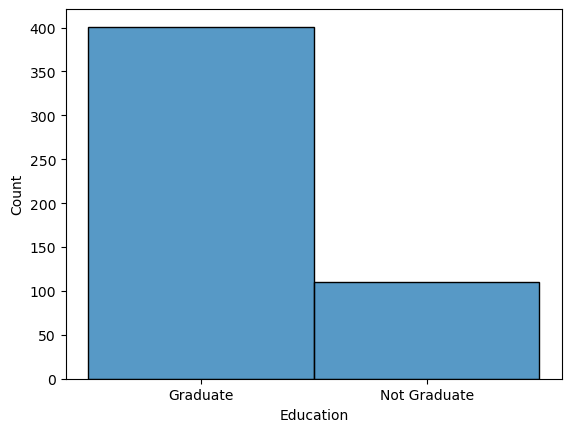

In [42]:
sns.histplot(df1['Education'])

<Figure size 1500x1000 with 0 Axes>

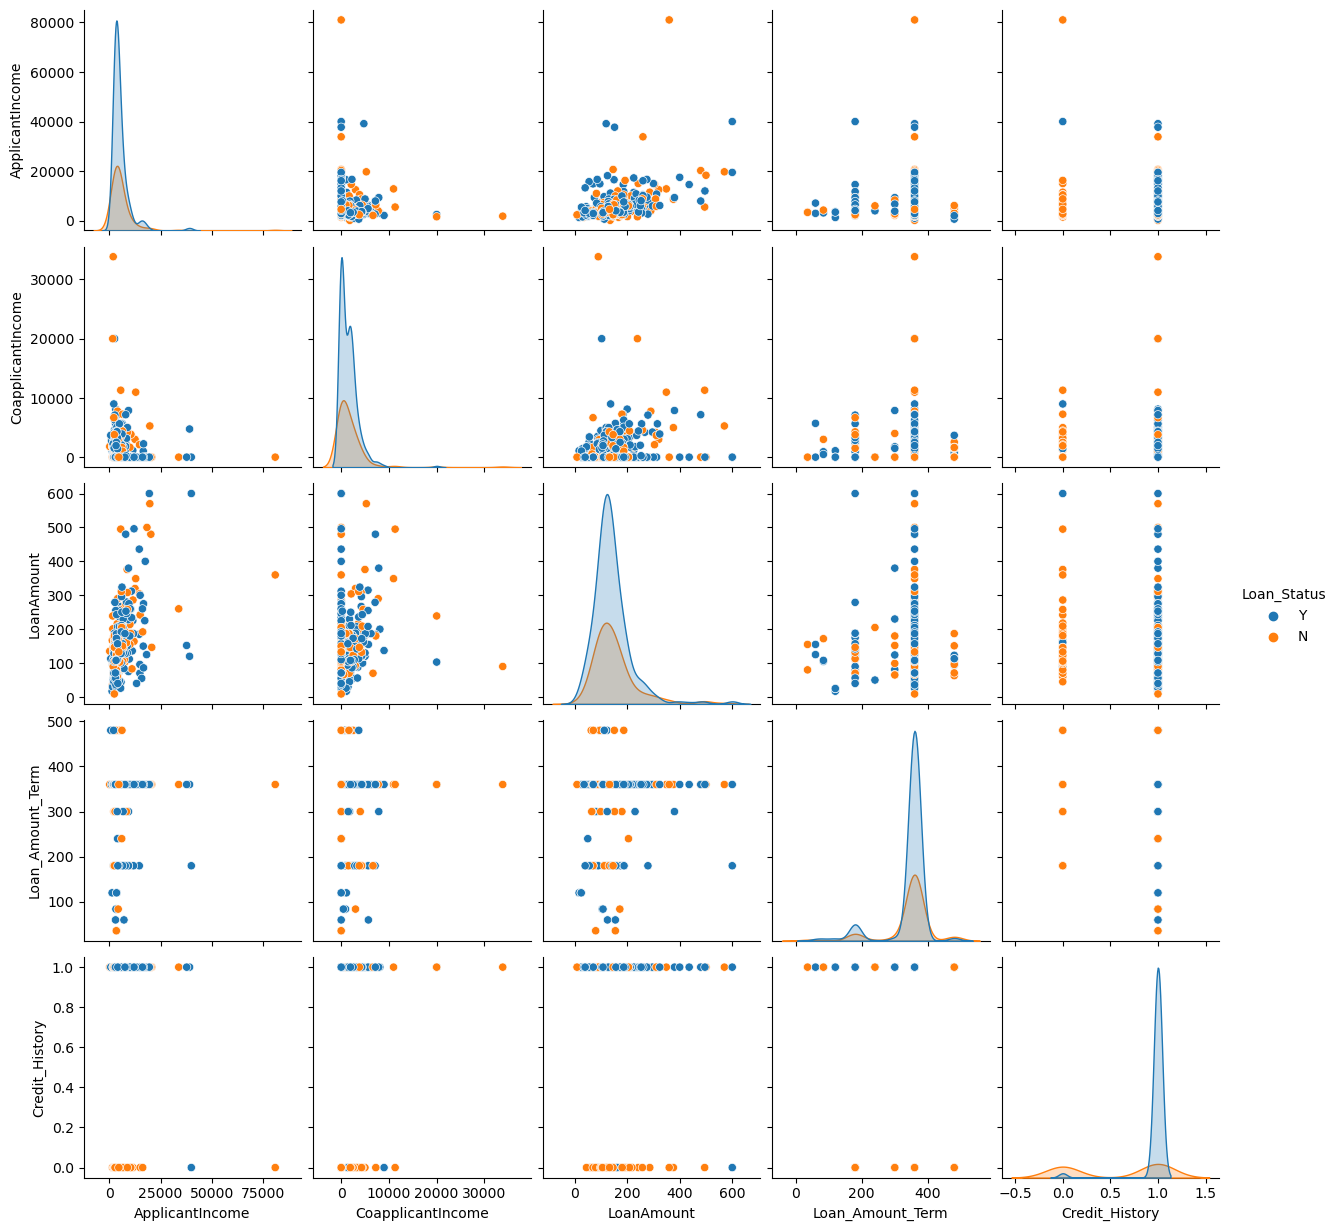

In [44]:
#Pair plot for all the features
plt.figure(figsize=(15,10))
sns.pairplot(data=df1,hue="Loan_Status")

# Checking For Outliers

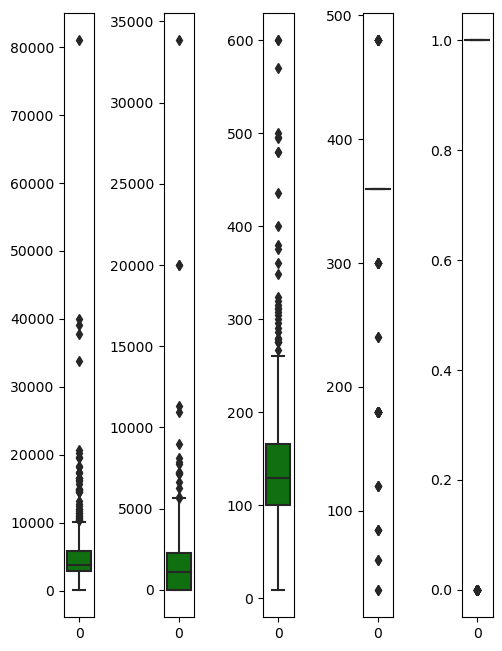

In [46]:
#outlier checking for numerical columns
lists=["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(lists)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df1[lists[i]],color='green',orient='v')
    plt.tight_layout()

There are lot of outliers in each numerical column, lets check those and remove

# ZSCORE METHOD

In [47]:
from scipy.stats import zscore

z=np.abs(zscore(df1[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]]))
print(np.where(z>3))

(array([  9,  13,  60,  83, 110, 132, 132, 150, 150, 155, 157, 204, 222,
       237, 263, 308, 311, 335, 342, 349, 373, 407, 413, 436, 438, 454,
       468, 480, 484, 487, 501], dtype=int64), array([1, 3, 3, 3, 3, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 2, 2, 1, 0, 1, 0, 2,
       3, 2, 2, 3, 2, 3, 1, 3, 2], dtype=int64))


In [49]:
z = np.abs(zscore(df1[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]]))
threshold = 3
dfn = df1[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df1.shape)
print ("Shape of the dataframe after removing outliers: ", dfn.shape)
print ("Percentage of data loss post outlier removal: ", (df1.shape[0]-dfn.shape[0])/df1.shape[0]*100)

Shape of the dataframe before removing outliers:  (511, 13)
Shape of the dataframe after removing outliers:  (482, 13)
Percentage of data loss post outlier removal:  5.6751467710371815


Data loss is 5.67%

# IQR METHOD

In [50]:
variables = df1[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]]

#1st quantile
Q1=variables.quantile(0.25)

# 3rd quantile
Q3=variables.quantile(0.75)

#IQR
IQR=Q3 - Q1
dfs=df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1> (Q3 + 1.5 * IQR))).any(axis=1)]

In [51]:
print ("Shape of the dataframe before removing outliers: ", df1.shape)
print ("Shape of the dataframe after removing outliers: ", dfs.shape)
print ("Percentage of data loss post outlier removal: ", (df1.shape[0]-dfs.shape[0])/df1.shape[0]*100)

Shape of the dataframe before removing outliers:  (511, 13)
Shape of the dataframe after removing outliers:  (327, 13)
Percentage of data loss post outlier removal:  36.007827788649706


Here in IQR method 36% data is lost, so we will continue with ZSCORE method

In [52]:
# Check Skewness
dfn.skew()

ApplicantIncome      2.127928
CoapplicantIncome    1.345582
LoanAmount           1.000741
Loan_Amount_Term    -2.080900
Credit_History      -1.863184
dtype: float64

we will treat the skewness within +/-0.5

In [53]:
skew_cols=["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]

In [54]:
#Removing the Skewness

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
dfn[skew_cols] = scaler.fit_transform(dfn[skew_cols].values)

In [55]:
#Checking the skewness again

dfn.skew()

ApplicantIncome     -0.002007
CoapplicantIncome   -0.159528
LoanAmount           0.046744
Loan_Amount_Term     0.706895
Credit_History      -1.863184
dtype: float64

In [56]:
dfn[skew_cols] = scaler.fit_transform(dfn[skew_cols].values)

In [57]:
#Checking the skewness again

dfn.skew()

ApplicantIncome     -0.264726
CoapplicantIncome   -0.129280
LoanAmount          -0.032652
Loan_Amount_Term     0.389885
Credit_History      -1.863184
dtype: float64

# Using LabelEncoder for convering categorical to numerical

In [58]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            482 non-null    object 
 1   Gender             482 non-null    object 
 2   Married            482 non-null    object 
 3   Dependents         482 non-null    object 
 4   Education          482 non-null    object 
 5   Self_Employed      482 non-null    object 
 6   ApplicantIncome    482 non-null    float64
 7   CoapplicantIncome  482 non-null    float64
 8   LoanAmount         482 non-null    float64
 9   Loan_Amount_Term   482 non-null    float64
 10  Credit_History     482 non-null    float64
 11  Property_Area      482 non-null    object 
 12  Loan_Status        482 non-null    object 
dtypes: float64(5), object(8)
memory usage: 52.7+ KB


In [59]:

from sklearn.preprocessing import LabelEncoder

In [60]:
labelencoder=LabelEncoder()
for column in dfn.columns:
    dfn[column] = labelencoder.fit_transform(dfn[column])

In [61]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Loan_ID            482 non-null    int32
 1   Gender             482 non-null    int32
 2   Married            482 non-null    int32
 3   Dependents         482 non-null    int32
 4   Education          482 non-null    int32
 5   Self_Employed      482 non-null    int32
 6   ApplicantIncome    482 non-null    int64
 7   CoapplicantIncome  482 non-null    int64
 8   LoanAmount         482 non-null    int64
 9   Loan_Amount_Term   482 non-null    int64
 10  Credit_History     482 non-null    int64
 11  Property_Area      482 non-null    int32
 12  Loan_Status        482 non-null    int32
dtypes: int32(8), int64(5)
memory usage: 37.7 KB


All columns are converted into numerical now

# Dividing data into X and Y

In [62]:
x=dfn.drop(['Loan_Status'],axis=1)
y=dfn['Loan_Status']

x.shape, y.shape

((482, 12), (482,))

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

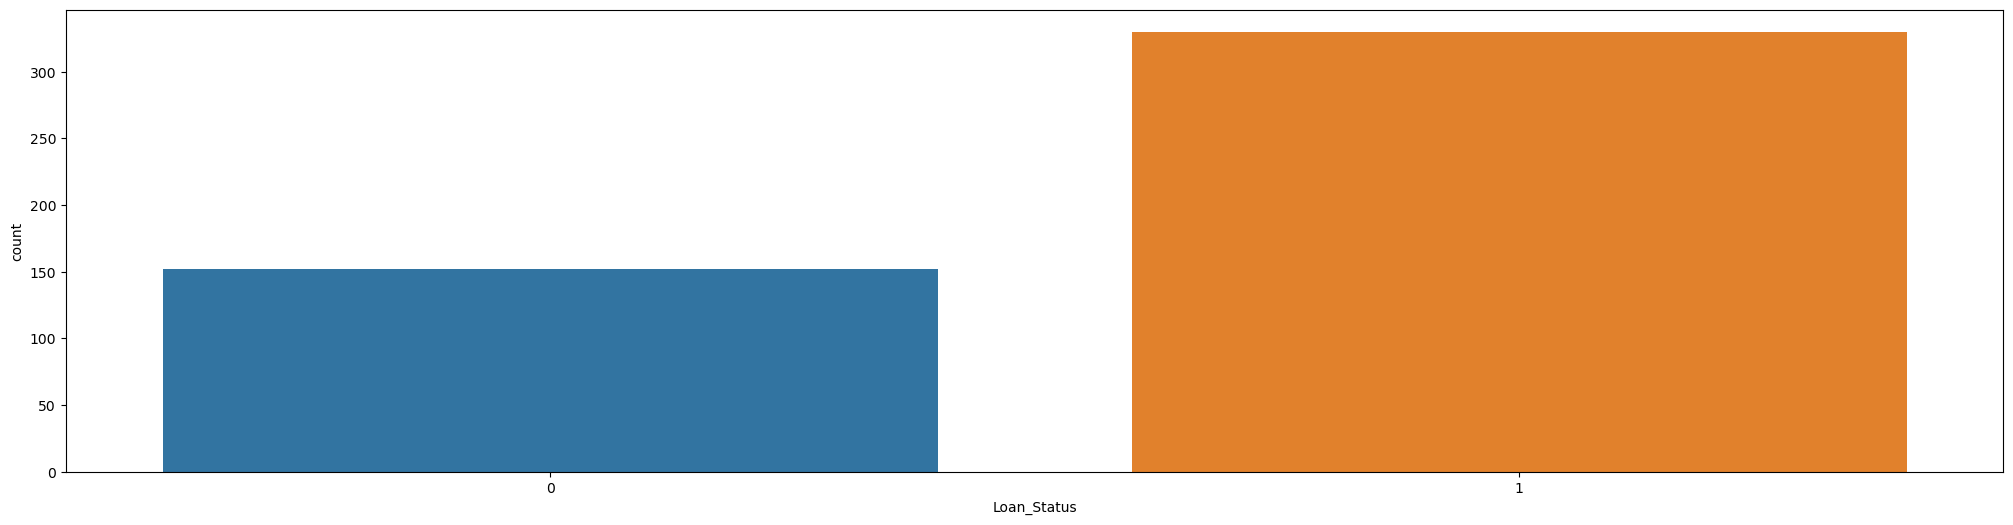

In [64]:
#count plot for 'Occupation' feature
plt.figure(figsize=(25,6))
sns.countplot(x='Loan_Status',data=dfn)

we need to balance the target data

# SMOTE

In [65]:
#importing smote library
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [66]:
#Applying SMOTE technique on DATa
X,Y=sm.fit_resample(x,y)

X.shape, Y.shape

((660, 12), (660,))

In [67]:
Y.value_counts()

1    330
0    330
Name: Loan_Status, dtype: int64

Now data is balanced

# Splitting the data for training and testing:

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [69]:
# To Find the best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    X_train,X_test,Y_train,Y_test= train_test_split(X,Y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(X_train,Y_train)
    pred= LR.predict(X_test)
    acc=accuracy_score(Y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.8560606060606061 on Random State = 149


In [70]:
#selecting Random State 149

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,random_state=149,test_size=.20)

In [71]:
#importing all reuired machine learning algorithm libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [73]:
#Trying different algorithms for training & testing
for i in model:
    i.fit(X_train,Y_train)
    i.score(X_train,Y_train)
    pred= i.predict(X_test)
    print('Accuracy_Score of ',i, 'is', accuracy_score(Y_test,pred)*100)
    print('Confusion Matrix of ',i,' is \n', confusion_matrix(Y_test,pred) )
    print(classification_report(Y_test,pred))
    print('=='*40)

Accuracy_Score of  LogisticRegression() is 85.60606060606061
Confusion Matrix of  LogisticRegression()  is 
 [[48 16]
 [ 3 65]]
              precision    recall  f1-score   support

           0       0.94      0.75      0.83        64
           1       0.80      0.96      0.87        68

    accuracy                           0.86       132
   macro avg       0.87      0.85      0.85       132
weighted avg       0.87      0.86      0.85       132

Accuracy_Score of  RidgeClassifier() is 83.33333333333334
Confusion Matrix of  RidgeClassifier()  is 
 [[47 17]
 [ 5 63]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.81        64
           1       0.79      0.93      0.85        68

    accuracy                           0.83       132
   macro avg       0.85      0.83      0.83       132
weighted avg       0.84      0.83      0.83       132

Accuracy_Score of  DecisionTreeClassifier() is 81.81818181818183
Confusion Matrix of  DecisionTr

Random Forest is working well

# CrossValidation

In [76]:
from sklearn.model_selection import cross_val_score

for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(Y_test,i.predict(X_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,X,Y,cv=5, scoring='accuracy').mean()*100)
    print('=='*40)

Accuracy_Score of  LogisticRegression() is 85.60606060606061
cross Validation accuracy score of  LogisticRegression()  is  76.36363636363637
Accuracy_Score of  RidgeClassifier() is 83.33333333333334
cross Validation accuracy score of  RidgeClassifier()  is  79.0909090909091
Accuracy_Score of  DecisionTreeClassifier() is 81.81818181818183
cross Validation accuracy score of  DecisionTreeClassifier()  is  51.21212121212121
Accuracy_Score of  SVC() is 53.03030303030303
cross Validation accuracy score of  SVC()  is  24.6969696969697
Accuracy_Score of  KNeighborsClassifier() is 62.121212121212125
cross Validation accuracy score of  KNeighborsClassifier()  is  42.72727272727273
Accuracy_Score of  RandomForestClassifier() is 89.39393939393939
cross Validation accuracy score of  RandomForestClassifier()  is  53.93939393939393
Accuracy_Score of  SGDClassifier() is 56.060606060606055
cross Validation accuracy score of  SGDClassifier()  is  53.63636363636364
Accuracy_Score of  BaggingClassifier() 

# Hyper parameter tuning For RidgeClassifier()

In [78]:
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,10],
              'fit_intercept': [True, False]}

from sklearn.model_selection import GridSearchCV

#grid = GridSearchCV(rc, parameters)
grid_search=GridSearchCV(estimator=RD_model,param_grid=parameters,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)

grid_search.best_estimator_

Fitting 5 folds for each of 22 candidates, totalling 110 fits


RidgeClassifier(alpha=10)

In [79]:
grid_search.best_params_

{'alpha': 10, 'fit_intercept': True}

In [80]:
GCV_pred1=grid_search.best_estimator_.predict(X_test)
accuracy_score(Y_test,GCV_pred1)

0.8257575757575758

# ROC AUC Plot

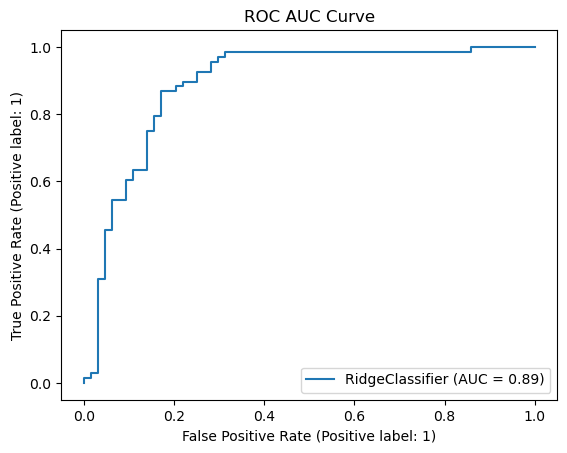

In [81]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

plot_roc_curve(grid_search.best_estimator_,X_test,Y_test)
plt.title('ROC AUC Curve')
plt.show()

# Saving the Model

In [82]:
import joblib
joblib.dump(grid_search.best_estimator_,"Loan_appl_Pred.pkl")

['Loan_appl_Pred.pkl']

# Testing/ Prediction

In [83]:
#Loading the saved model
GCV_pred1=joblib.load("Loan_appl_Pred.pkl")

#Prediction
prediction = GCV_pred1.predict(X_test)
prediction

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0])

In [84]:
pd.DataFrame([GCV_pred1.predict(X_test)[:],Y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
Predicted,1,1,0,1,1,0,0,0,1,1,...,1,0,1,1,1,1,0,0,1,0
Actual,1,1,0,1,1,0,0,0,1,1,...,1,0,1,0,1,1,0,0,1,0
